<a href="https://colab.research.google.com/github/D-Shah28/Prasunet_DS_02/blob/main/Prasunet_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA on Titanic Data from Kaggle

In [73]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

For loading the data I have uploaded it first to my github reopository and then give a direct link to pandas dataframe

In [74]:
#loading the train and test dataset into pandas datframe
test_df = pd.read_csv('https://raw.githubusercontent.com/D-Shah28/Prasunet_DS_02/main/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/D-Shah28/Prasunet_DS_02/main/train.csv')

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data preprocessing and cleaning

In [77]:
#checking the null value in the train dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
#checking the null value in the test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
# we can use mean to handle missing values in age column
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [80]:
# We'll drop the Cabin column since it has a lot of missing values and might not be very informative.
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [81]:
# for embarked column we will use mode to handle the missing valua as it is a character column
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace = True)

In [82]:
# for fare column we will use mean to handle the missing value
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [83]:
# check the missing value again
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
# Convert 'Sex' to numerical values (0 = male, 1 = female)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values (C = 0, Q = 1, S = 2)
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0


as there is no missing value we will move further with our EDA

Note- we will use the train dataset to analyse the data as we have to train our model on the basis of it.

Exploratory Data Analysis

In [86]:
# Check Statistical analysis of data
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.535433
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


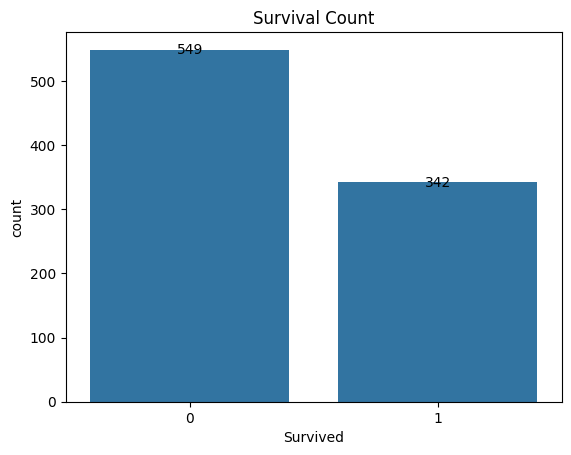

In [87]:
# Check survival count
ax= sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center')

plt.show()

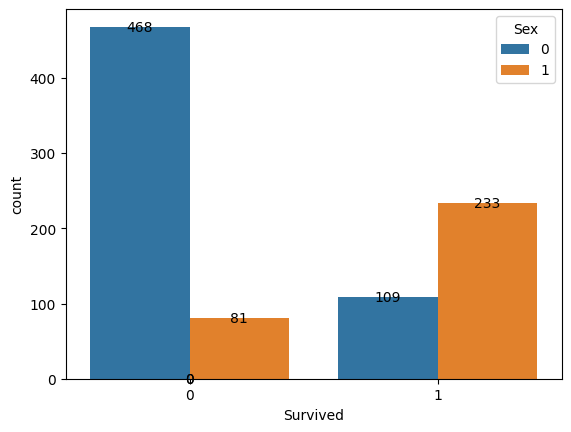

In [91]:
#check the gender wise surrvival count
ax = sns.countplot(x='Survived', hue='Sex', data=train_df) # 0 = male and 1 = female

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center')

plt.show()

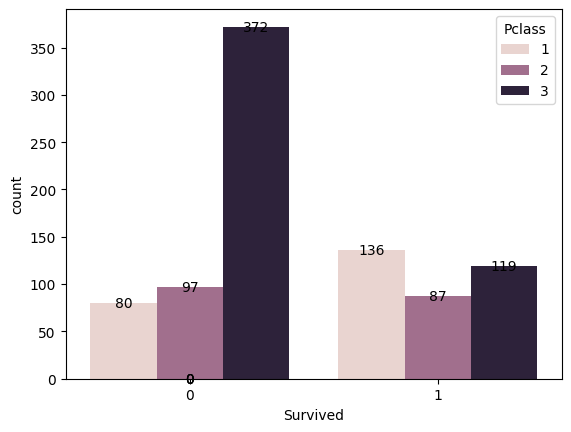

In [108]:
#checck the no. of survival's as per the class
ax = sns.countplot(x='Survived', hue='Pclass', data=train_df) # 0 = not survived and 1 survived

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center')

plt.show()

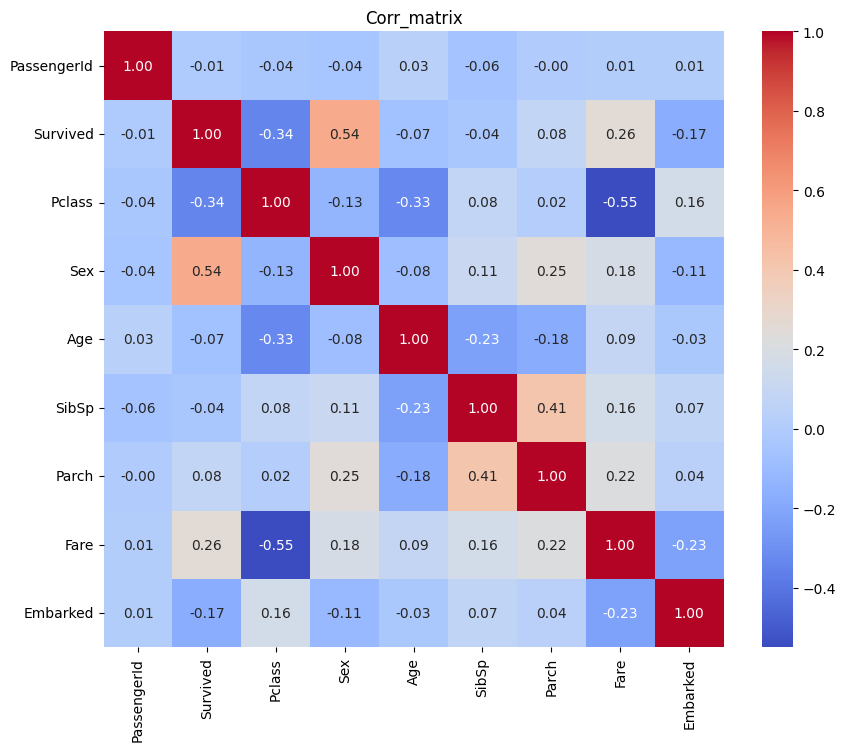

In [107]:
# check coorrelation of variables with the help of heatmap
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corr_matrix')
plt.show()

Pattern and trends-:

From the EDA of Titanic data we found some patterns and trends that:


1. The majority of passengers were male.

2. The majority of passengers were in Pclass 3.

3. The majority of passengers embarked from Southampton.

4. There is a strong correlation between Pclass and Survived.

5. Females were more likely to survive than males.

6. Passengers in Pclass 1 were more likely to survive than those in Pclass 3.

